In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import time
import scipy.stats as sts
from scipy.stats import linregress
from matplotlib import pyplot as plt
import json
from pprint import pprint
pd.options.display.max_rows = 50 

In [52]:
path_stats_file = "data_resources/QB Stats and Weather Data.csv"
QB_df = pd.read_csv(path_stats_file)

In [53]:
qb_df = pd.read_csv(path_stats_file)

In [4]:
#value_counts on conditions
QB_conditions = QB_df[["QB Rating", "conditions"]]
QB_conditions["conditions"].value_counts()

clear sky               786
overcast                392
mostly cloudy           227
partly cloudy           219
scattered clouds        138
overcast clouds         120
broken clouds            95
light rain               83
few clouds               61
rain                     57
moderate rain            33
cloudy                   33
haze                     22
light snow               16
snow                      8
mist                      6
heavy intensity rain      4
chance rain               4
breeze                    2
cold                      2
thunderstorm              2
very heavy rain           2
shower rain               2
fog                       2
heavy rain                2
Name: conditions, dtype: int64

In [5]:
#Wind speed stats
QB_wind = QB_df[["QB Rating", "windSpeed"]]
QB_wind["windSpeed"].max()

39.15

In [6]:
QB_wind["windSpeed"].min()

0.0

In [7]:
QB_wind["windSpeed"].mean()

8.022395157803778

In [8]:
QB_wind["windSpeed"].median()

7.0

In [9]:
#high wind (>25)
QB_highwinds = QB_df[["QB Rating", "windSpeed"]]
QB_highwinds = QB_df.query('windSpeed > 25')
QB_highwinds["windSpeed"].count()


11

In [10]:
QB_highwinds["QB Rating"].max()

125.61274509803921

In [11]:
QB_highwinds["QB Rating"].min()

52.08333333333334

In [12]:
QB_highwinds["QB Rating"].mean()

85.10456884008579

In [13]:
QB_highwinds["QB Rating"].median()

79.73484848484848

In [14]:
#value_counts on heavy rain
QB_heavyrain = QB_df[["QB Rating", "conditions"]]
QB_heavyrain = QB_heavyrain.query('conditions == "heavy intensity rain" or conditions == "very heavy rain"or conditions == "heavy rain"  or  conditions == "thunderstorm" ')
QB_heavyrain.value_counts()


QB Rating   conditions          
110.218254  heavy intensity rain    1
97.537879   heavy rain              1
91.388889   thunderstorm            1
91.319444   heavy intensity rain    1
87.916667   very heavy rain         1
86.322464   heavy intensity rain    1
79.583333   thunderstorm            1
77.840909   very heavy rain         1
59.821429   heavy intensity rain    1
57.025194   heavy rain              1
dtype: int64

In [15]:
#QB Rating stats in heavy rain
#Includes "heavy rain", "very heavy rain", "heavy intensity rain" and thunderstorms
QB_heavyrain["QB Rating"].max()

110.21825396825398

In [16]:
QB_heavyrain["QB Rating"].min()

57.0251937984496

In [17]:
QB_heavyrain["QB Rating"].mean()

83.89744613183694

In [18]:
QB_heavyrain["QB Rating"].median()

87.11956521739131

In [19]:
#high temperature (>85)
QB_hightemp = QB_df[["QB Rating", "temperature"]]
QB_hightemp = QB_hightemp.query('temperature > 85')
QB_hightemp["QB Rating"].count()

117

In [20]:
#QB stats in high temperatures(>85)

In [21]:
QB_hightemp["QB Rating"].max()

158.33333333333331

In [22]:
QB_hightemp["QB Rating"].min()

13.446969696969699

In [23]:
QB_hightemp["QB Rating"].mean()

89.05486488607615

In [24]:
QB_hightemp["QB Rating"].median()

91.19897959183672

In [25]:
#low temperature (<32)
QB_lowtemp = QB_df[["QB Rating", "temperature"]]
QB_lowtemp = QB_lowtemp.query('temperature < 32')
QB_lowtemp["QB Rating"].count()

104

In [26]:
#QB stats in low temperatures(<32)

In [27]:
QB_lowtemp["QB Rating"].max()

150.81521739130437

In [28]:
QB_lowtemp["QB Rating"].min()

9.280303030303028

In [29]:
QB_lowtemp["QB Rating"].mean()

78.92892045933391

In [30]:
QB_lowtemp["QB Rating"].median()

82.85942192192192

In [31]:
#all conditions
QB_df["QB Rating"].max()

158.33333333333331

In [32]:
QB_df["QB Rating"].min()

0.0

In [33]:
QB_overall_mean=QB_df["QB Rating"].mean()

In [34]:
QB_df["QB Rating"].median()

88.95202020202021

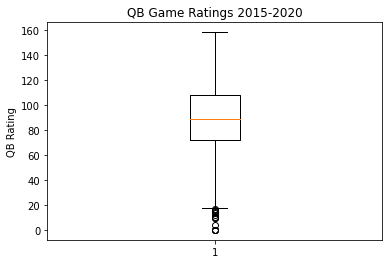

In [35]:
#look for outliers
QBRating=QB_df["QB Rating"]
fig, ax = plt.subplots()
ax.set_title('QB Game Ratings 2015-2020')
ax.set_ylabel('QB Rating')
ax.boxplot(QBRating)
plt.show()

In [36]:
quartiles = QBRating.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq  

print(f"The lower quartile of QB Rating is: {lowerq}")
print(f"The upper quartile of QB Rating is: {upperq}")
print(f"The interquartile range of QB Rating is: {iqr}")
print(f"The the median of QB Rating is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of QB Rating is: 71.73214285714286
The upper quartile of QB Rating is: 107.68136160714286
The interquartile range of QB Rating is: 35.94921875
The the median of QB Rating is: 88.95202020202021 
Values below 17.80831473214286 could be outliers.
Values above 161.60518973214286 could be outliers.


In [37]:
small_outliers_df = QB_df.loc[QB_df["QB Rating"] < lower_bound]
small_outliers_df.temperature

199     45.0
726     33.8
858     70.0
1174    19.0
1190    61.0
1507    33.0
1682    87.0
1723    69.0
1736    58.0
2049    77.0
2171    57.0
2181    72.0
2294    39.0
2304    38.0
Name: temperature, dtype: float64

NormaltestResult(statistic=4.09620590334466, pvalue=0.128979351713012)


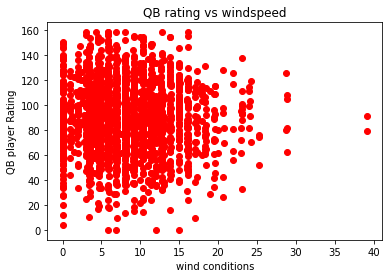

In [38]:
plt.title("QB rating vs windspeed")
plt.xlabel("wind conditions")
plt.ylabel("QB player Rating")
plt.scatter(QB_wind["windSpeed"], QB_wind["QB Rating"], color='r')
print(sts.normaltest(QB_wind["QB Rating"].sample(100)))
#Does this have value?
#p-value indicates accept null hypothesis

In [54]:
QB_highwinds_mean=QB_highwinds["QB Rating"].mean()
QB_heavyrain_mean=QB_heavyrain["QB Rating"].mean()
QB_hightemp_mean=QB_hightemp["QB Rating"].mean()
QB_lowtemp_mean=QB_lowtemp["QB Rating"].mean()
QB_overall_mean=QB_df["QB Rating"].mean()

NormaltestResult(statistic=0.7283689756303233, pvalue=0.6947630076094631)
Variance = 700.6024744365968
Standard Deviation = 26.46889635849211


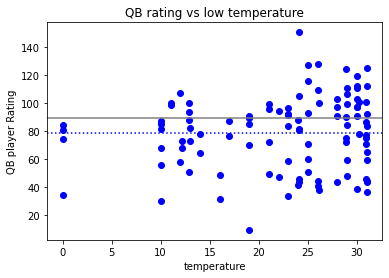

In [42]:
plt.title("QB rating vs low temperature")
plt.xlabel("temperature")
plt.ylabel("QB player Rating")
plt.scatter(QB_lowtemp["temperature"], QB_lowtemp["QB Rating"], color='b')
plt.axhline(y=QB_overall_mean, color="gray", linestyle = '-')
plt.axhline(y=QB_lowtemp_mean, color="b", linestyle = 'dotted')
print(sts.normaltest(QB_lowtemp["QB Rating"]))
print(f'Variance = {QB_lowtemp["QB Rating"].var()}')
print(f'Standard Deviation = {QB_lowtemp["QB Rating"].std()}')

NormaltestResult(statistic=0.7347783725666823, pvalue=0.6925400654953082)
Variance = 838.7517048753682
Standard Deviation = 28.961210348936874


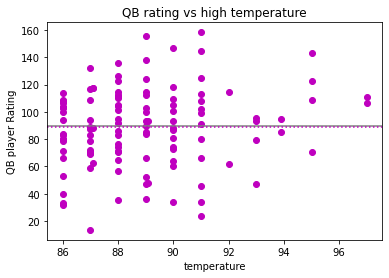

In [55]:
plt.title("QB rating vs high temperature")
plt.xlabel("temperature")
plt.ylabel("QB player Rating")
plt.scatter(QB_hightemp["temperature"], QB_hightemp["QB Rating"], color='m')
plt.axhline(y=QB_overall_mean, color="gray", linestyle = '-')
plt.axhline(y=QB_hightemp_mean, color="m", linestyle = 'dotted')
ax.text(100, 89.2549, 'Mean QB Rating All Conditions', va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
        transform=ax.get_yaxis_transform())
print(sts.normaltest(QB_hightemp["QB Rating"]))
print(f'Variance = {QB_hightemp["QB Rating"].var()}')
print(f'Standard Deviation = {QB_hightemp["QB Rating"].std()}')

NormaltestResult(statistic=0.7347783725666823, pvalue=0.6925400654953082)
Variance = 445.8688657552428
Standard Deviation = 21.115607160468837


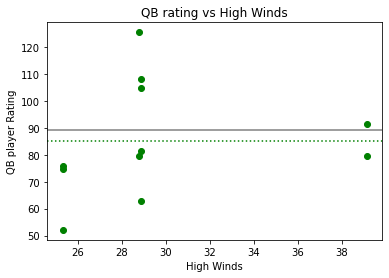

In [56]:
plt.title("QB rating vs High Winds")
plt.xlabel("High Winds")
plt.ylabel("QB player Rating")
plt.scatter(QB_highwinds["windSpeed"], QB_highwinds["QB Rating"], color='g')
plt.axhline(y=QB_overall_mean, color="gray", linestyle = '-')
plt.axhline(y=QB_highwinds_mean, color="g", linestyle = 'dotted')
print(sts.normaltest(QB_hightemp["QB Rating"]))
print(f'Variance = {QB_highwinds["QB Rating"].var()}')
print(f'Standard Deviation = {QB_highwinds["QB Rating"].std()}')

NormaltestResult(statistic=0.3855215988285118, pvalue=0.8246792142992982)
Variance = 263.239413687631
Standard Deviation = 16.22465450133318


C:\Users\jenpu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


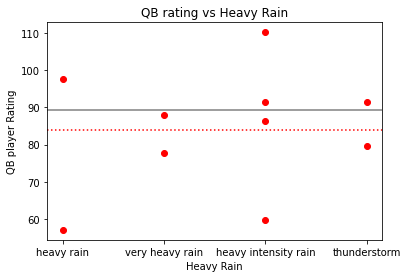

In [45]:
plt.title("QB rating vs Heavy Rain")
plt.xlabel("Heavy Rain")
plt.ylabel("QB player Rating")
plt.scatter(QB_heavyrain["conditions"], QB_heavyrain["QB Rating"], color='r')
plt.axhline(y=QB_overall_mean, color="gray", linestyle = '-')
plt.axhline(y=QB_heavyrain_mean, color="r", linestyle = 'dotted')
print(sts.normaltest(QB_heavyrain["QB Rating"]))
print(f'Variance = {QB_heavyrain["QB Rating"].var()}')
print(f'Standard Deviation = {QB_heavyrain["QB Rating"].std()}')

In [57]:
QB_means=pd.Series([QB_highwinds_mean, QB_heavyrain_mean,QB_hightemp_mean, QB_lowtemp_mean],\
                   index=["high wind", "heavy rain", "high temp", "low temp"])

In [58]:
#for chi-sq
comparison_df=pd.DataFrame([QB_means]).T

In [59]:
#for chi-sq
comparison_df[1]=QB_overall_mean

In [60]:
#for chi-sq
comparison_df.columns=["observed", "expected"]

comparison_df

,observed,expected
high wind,85.104569,89.254916
heavy rain,83.897446,89.254916
high temp,89.054865,89.254916
low temp,78.928920,89.254916


<AxesSubplot:>

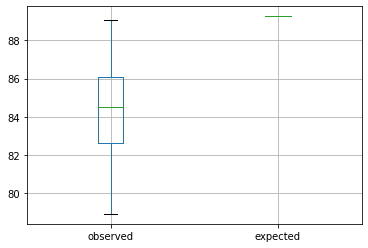

In [65]:
comparison_df.boxplot()

In [66]:
critical_value = sts.chi2.ppf(q = 0.95, df = 2)
critical_value

5.991464547107979

In [67]:
sts.chisquare(comparison_df['observed'],comparison_df['expected'])
#compare statistic to critical value...what does it mean?

Power_divergenceResult(statistic=1.7096431367253235, pvalue=0.6347920379455683)

In [ ]:
#for Anova build the dataframe
#columns = weather condition, QB Rating
#want to consolidate conditions to defined extremes

In [ ]:
#for ANOVA
#comparison_df.boxplot("QB_Rating", by="weather", figsize=(20, 10))

In [68]:
QB_index=QB_df.set_index("lastName").groupby(["lastName"])
Avg_QB_Rating_df=QB_index["QB Rating"].mean()

Avg_QB_Rating_df.sort_values(ascending=False).head(10)


lastName
Henne        111.197917
Mahomes      110.147117
Wilson       103.407367
Brees        103.204613
Rodgers      102.493012
Weeden       102.243590
Jackson      100.585098
Tannehill     99.699027
McCarron      99.483300
Ryan          99.388318
Name: QB Rating, dtype: float64

In [69]:
Avg_QB_Rating_df.sort_values(ascending=False).tail(10)

lastName
Kizer       58.452828
Finley      58.249311
Stanton     58.244048
Peterman    56.657218
Luton       56.153447
Sudfeld     52.762681
Walker      49.177171
Sanchez     44.402882
Stidham     42.547591
Tolzien     33.796296
Name: QB Rating, dtype: float64

In [70]:
games_played=QB_df["lastName"]
games_played.value_counts().tail(10)

Romo        2
Heinicke    2
DiNucci     1
Blough      1
Tolzien     1
Cook        1
Rypien      1
Fales       1
Mannion     1
Henne       1
Name: lastName, dtype: int64

In [71]:
games_played.value_counts().head(10)

Brady             82
Wilson            82
Rivers            80
Carr              79
Rodgers           68
Dalton            68
Roethlisberger    67
Newton            66
Manning           63
Wentz             60
Name: lastName, dtype: int64

In [72]:
games_played_query=QB_df.query

In [73]:
games_played_query=QB_df.query('lastName == "Mahomes"or lastName == "Wilson"  or lastName == "Brees" or \
lastName == "Rodgers" or lastName == "Jackson" ')

games_played_query["lastName"].value_counts()

Wilson     82
Rodgers    68
Mahomes    42
Jackson    34
Brees      26
Name: lastName, dtype: int64

In [131]:
#Create bins for wind speed
bins=[-1, 10, 25, 40]
group_labels=["0-10", "11-25", "26-40"]
pd.cut(QB_wind["windSpeed"], bins, labels=group_labels).head()

0     0-10
1     0-10
2    11-25
3    11-25
4    11-25
Name: windSpeed, dtype: category
Categories (3, object): ['0-10' < '11-25' < '26-40']

In [132]:
QB_df['Wind Category'] = pd.cut(QB_df['windSpeed'], bins, labels=group_labels)

In [133]:
for qb_name,df_temp in QB_df.groupby(['lastName']):
    
    
    temp_group = df_temp.groupby(['Wind Category'])['QB Rating'].mean()

In [134]:
list(temp_group.index)

['0-10', '11-25', '26-40']

In [135]:
#top 5 by QB Rating
top_five_rating=["Mahomes", "Wilson", "Brees", "Rodgers", "Jackson"]
top_QB_Rating_df= QB_df[QB_df.lastName.isin(top_five_rating)].copy()

In [136]:
qb_wind_rating_df = pd.DataFrame(top_QB_Rating_df.groupby\
                                 (['lastName', 'Wind Category'])["QB Rating"].mean().dropna()).reset_index()

In [137]:
# Shaun says: don't use temp_group (from cell below)
#temp_group=
final_wind_df = pd.DataFrame({}, index=list(temp_group.index))

for idx,row in qb_wind_rating_df.iterrows():
    final_wind_df.loc[row["Wind Category"], row["lastName"]] = row["QB Rating"]

In [104]:
Brady=QB_df[["QB Rating", "lastName"]]
Brady=Brady.query('lastName == "Brady"')
Carr=QB_df[["QB Rating", "lastName"]]
Carr=Carr.query('lastName == "Carr"')
Rivers=QB_df[["QB Rating", "lastName"]]
Rivers=Rivers.query('lastName == "Rivers"')
Rodgers=QB_df[["QB Rating", "lastName"]]
Rodgers=Rodgers.query('lastName == "Rodgers"')
Wilson=QB_df[["QB Rating", "lastName"]]
Wilson=Wilson.query('lastName == "Wilson"')
Brees=QB_df[["QB Rating", "lastName"]]
Brees=Brees.query('lastName == "Brees"')
Jackson=QB_df[["QB Rating", "lastName"]]
Jackson=Jackson.query('lastName == "Jackson"')
Mahomes=QB_df[["QB Rating", "lastName"]]
Mahomes=Mahomes.query('lastName == "Mahomes"')
print(f'Brady mean= {Brady.mean()}')
print(f'Carr mean = {Carr.mean()}')
print(f'Rivers mean = {Rivers.mean()}')
print(f'Rodgers mean = {Rodgers.mean()}')
print(f'Wilson mean = {Wilson.mean()}')
print(f'Brees mean = {Brees.mean()}')
print(f'Jackson mean = {Jackson.mean()}')
print(f'Mahomes mean = {Mahomes.mean()}')

Brady mean= QB Rating    99.381003
dtype: float64
Carr mean = QB Rating    94.489262
dtype: float64
Rivers mean = QB Rating    94.394207
dtype: float64
Rodgers mean = QB Rating    102.493012
dtype: float64
Wilson mean = QB Rating    103.407367
dtype: float64
Brees mean = QB Rating    103.204613
dtype: float64
Jackson mean = QB Rating    100.585098
dtype: float64
Mahomes mean = QB Rating    110.147117
dtype: float64


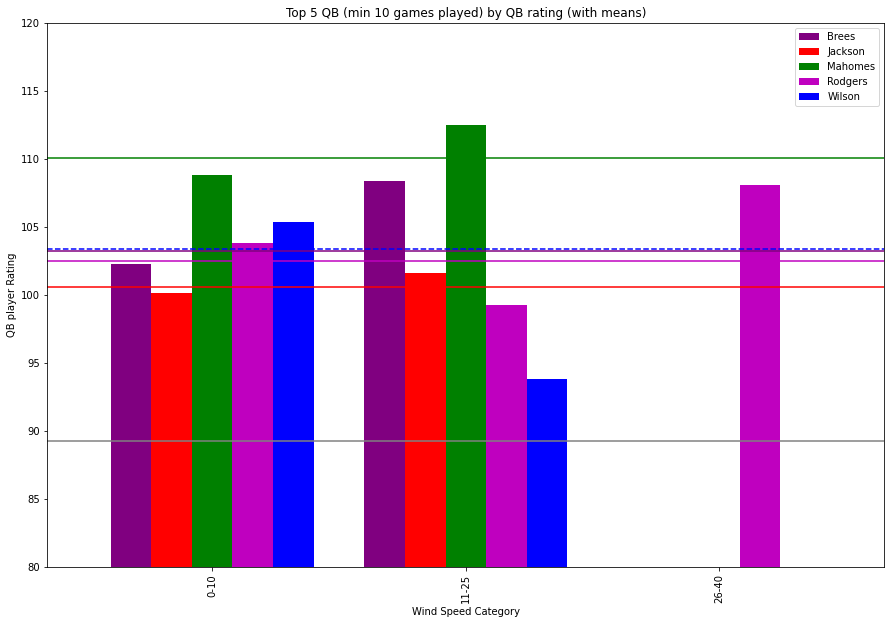

In [138]:
final_wind_df.plot(kind="bar", width = .8, ylim= (80, 120), figsize = (15, 10), \
                    color= {"Brees": "purple", "Jackson": "red", "Mahomes": "green", "Rodgers": "m", "Wilson": "b"}) 
plt.title("Top 5 QB (min 10 games played) by QB rating (with means)")
plt.xlabel("Wind Speed Category")
plt.ylabel("QB player Rating")
plt.axhline(y=QB_overall_mean, color="gray", linestyle = '-')
plt.axhline(y=103.2, color="purple", linestyle = '-')
plt.axhline(y=100.6, color="red", linestyle = '-')
plt.axhline(y=110.1, color="green", linestyle = '-')
plt.axhline(y=102.5, color="m", linestyle = '-')
plt.axhline(y=103.4, color="b", linestyle = '--')
#, color={"Brees": "gray", "Jackson": "gray", "Mahomes": "green", "Rodgers": "gray", "Wilson": "gray"})

In [139]:
#top 5 by games played
top_five_games=["Brady", "Rivers", "Rodgers", "Carr", "Wilson"]
top_game_df= QB_df[QB_df.lastName.isin(top_five_games)].copy()


In [140]:
for qb_name,df_temp in QB_df.groupby(['lastName']):
    
    
    temp_group = df_temp.groupby(['Wind Category'])['QB Rating'].mean()

In [141]:
list(temp_group.index)

['0-10', '11-25', '26-40']

In [142]:
qb_wind_game_df = pd.DataFrame(top_game_df.groupby(['lastName', 'Wind Category'])["QB Rating"].mean().dropna()).reset_index()


In [143]:
final_wind_game_df = pd.DataFrame({}, index=list(temp_group.index))

for idx,row in qb_wind_game_df.iterrows():
    final_wind_game_df.loc[row["Wind Category"], row["lastName"]] = row["QB Rating"]

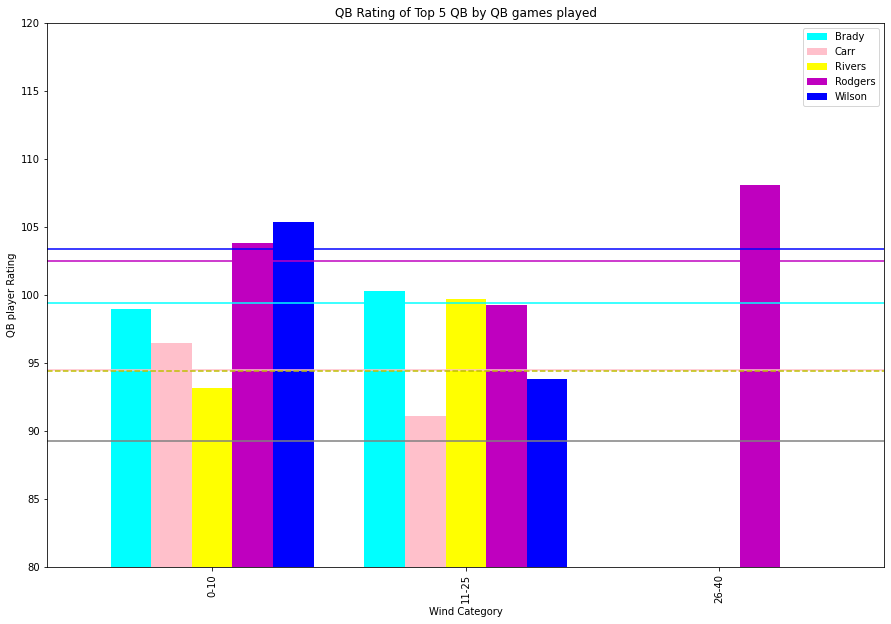

In [144]:
final_wind_game_df.plot(kind="bar", width = .8, ylim= (80, 120), figsize = (15, 10), color= {"Brady": "cyan", "Carr": "pink", "Rivers": "yellow", "Rodgers": "m", "Wilson": "b"}) 
plt.title("QB Rating of Top 5 QB by QB games played")
plt.xlabel("Wind Category")
plt.ylabel("QB player Rating")

plt.axhline(y=QB_overall_mean, color="gray", linestyle = '-')
plt.axhline(y=99.4, color="cyan", linestyle = '-')
plt.axhline(y=94.5, color="pink", linestyle = '-')
plt.axhline(y=94.4, color="y", linestyle = '--')
plt.axhline(y=102.5, color="m", linestyle = '-')
plt.axhline(y=103.4, color="b", linestyle = '-')



In [145]:
#bottom 5 by games rating with 10+ games
bottom_five_rating=["Kizer", "Foles", "Driskel", "Haskins", "Gabbert"]
bottom_five_df= QB_df[QB_df.lastName.isin(bottom_five_rating)].copy()

In [146]:
qb_wind_bottom_df = pd.DataFrame(bottom_five_df.groupby(['lastName', 'Wind Category'])["QB Rating"].mean().dropna()).reset_index()

In [147]:
final_wind_bottom_df = pd.DataFrame({}, index=list(temp_group.index))

for idx,row in qb_wind_bottom_df.iterrows():
    final_wind_bottom_df.loc[row["Wind Category"], row["lastName"]] = row["QB Rating"]

In [102]:
Kizer=QB_df[["QB Rating", "lastName"]]
Kizer=Kizer.query('lastName == "Kizer"')
Foles=QB_df[["QB Rating", "lastName"]]
Foles=Foles.query('lastName == "Foles"')
Driskel=QB_df[["QB Rating", "lastName"]]
Driskel=Driskel.query('lastName == "Driskel"')
Haskins=QB_df[["QB Rating", "lastName"]]
Haskins=Haskins.query('lastName == "Haskins"')
Gabbert=QB_df[["QB Rating", "lastName"]]
Gabbert=Gabbert.query('lastName == "Gabbert"')
print(f'Kizer mean= {Kizer.mean()}')
print(f'Foles mean = {Foles.mean()}')
print(f'Driskel mean = {Driskel.mean()}')
print(f'Haskins mean = {Haskins.mean()}')
print(f'Gabbert mean = {Gabbert.mean()}')


Kizer mean= QB Rating    58.452828
dtype: float64
Foles mean = QB Rating    73.506912
dtype: float64
Driskel mean = QB Rating    77.895184
dtype: float64
Haskins mean = QB Rating    76.691263
dtype: float64
Gabbert mean = QB Rating    75.902264
dtype: float64


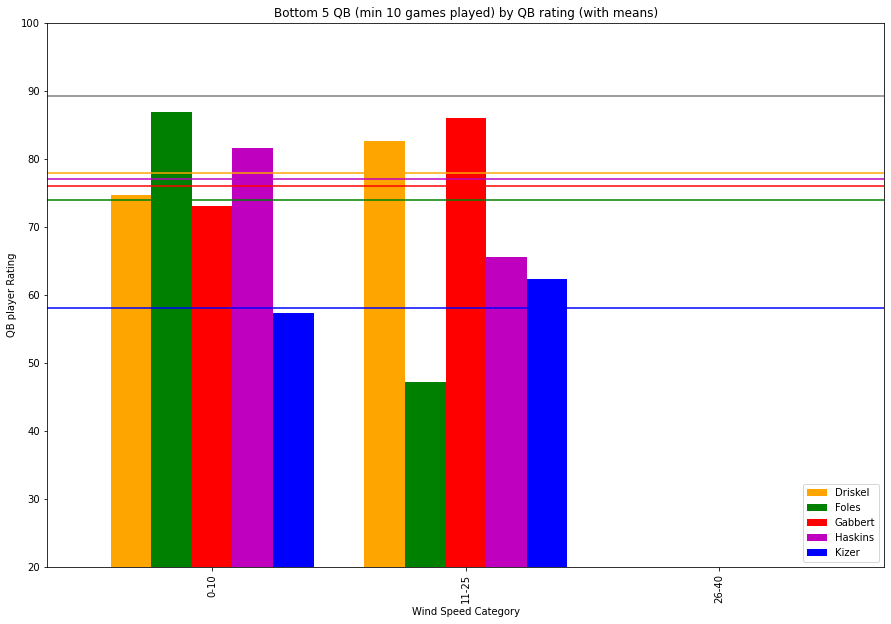

In [148]:
final_wind_bottom_df.plot(kind="bar", width = .8, ylim= (20, 100), figsize = (15, 10), color= {"Kizer": "blue", "Foles": "green", "Driskel": "orange", "Haskins": "m", "Gabbert": "r"}) 
plt.title("Bottom 5 QB (min 10 games played) by QB rating (with means)")
plt.xlabel("Wind Speed Category")
plt.ylabel("QB player Rating")

plt.axhline(y=QB_overall_mean, color="gray", linestyle = '-')
plt.axhline(y=58, color="b", linestyle = '-')
plt.axhline(y=74, color="g", linestyle = '-')
plt.axhline(y=78, color="orange", linestyle = '-')
plt.axhline(y=77, color="m", linestyle = '-')
plt.axhline(y=76, color="r", linestyle = '-')


In [149]:
QB_temperature = QB_df[["QB Rating", "temperature"]]

In [150]:
#Create bins for temperature
bins=[-1, 32, 85, 100,]
group_labels=["freezing (<=32)", "moderate(33-85) ", "hot (>85)"]
pd.cut(QB_temperature["temperature"], bins, labels=group_labels).head()

0    moderate(33-85) 
1    moderate(33-85) 
2    moderate(33-85) 
3    moderate(33-85) 
4    moderate(33-85) 
Name: temperature, dtype: category
Categories (3, object): ['freezing (<=32)' < 'moderate(33-85) ' < 'hot (>85)']

In [151]:
QB_df['Temperature Category'] = pd.cut(QB_df['temperature'], bins, labels=group_labels)
#QB_df

In [ ]:
#top 5 by QB Rating
top_five_rating=["Mahomes", "Wilson", "Brees", "Rodgers", "Jackson"]
top_QB_Rating_df= QB_df[QB_df.lastName.isin(top_five_rating)].copy()

In [158]:
for qb_name,df_temp in QB_df.groupby(['lastName']):
    
    
    temp_group = df_temp.groupby(['Temperature Category'])['QB Rating'].mean()

In [159]:
qb_temperature_rating_df = pd.DataFrame(top_QB_Rating_df.groupby\
                               (['lastName', 'Temperature Category'])["QB Rating"].mean().dropna()).reset_index()


In [160]:
final_temperature_rating_df = pd.DataFrame({}, index=list(temp_group.index))

for idx,row in qb_temperature_rating_df.iterrows():
    final_temperature_rating_df.loc[row["Temperature Category"], row["lastName"]] = row["QB Rating"]

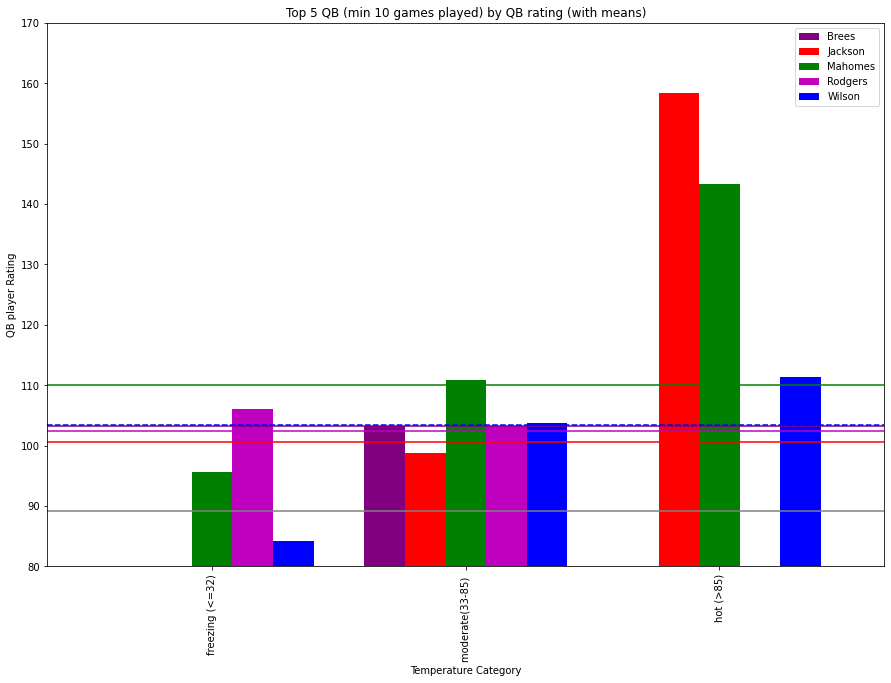

In [164]:
final_temperature_rating_df.plot(kind="bar", width = .8, ylim= (80, 170), figsize = (15, 10), \
                    color= {"Brees": "purple", "Jackson": "red", "Mahomes": "green", "Rodgers": "m", "Wilson": "b"}) 
plt.title("Top 5 QB (min 10 games played) by QB rating (with means)")
plt.xlabel("Temperature Category")
plt.ylabel("QB player Rating")
plt.axhline(y=QB_overall_mean, color="gray", linestyle = '-')
plt.axhline(y=103.2, color="purple", linestyle = '-')
plt.axhline(y=100.6, color="red", linestyle = '-')
plt.axhline(y=110.1, color="green", linestyle = '-')
plt.axhline(y=102.5, color="m", linestyle = '-')
plt.axhline(y=103.4, color="b", linestyle = '--')

In [153]:
#top 5 by games played
top_five_games=["Brady", "Rivers", "Rodgers", "Carr", "Wilson"]
top_game_df= QB_df[QB_df.lastName.isin(top_five_games)].copy()


In [154]:
for qb_name,df_temp in QB_df.groupby(['lastName']):
    
    
    temp_group = df_temp.groupby(['Temperature Category'])['QB Rating'].mean()

In [128]:
qb_temperature_game_df = pd.DataFrame(top_game_df.groupby\
                               (['lastName', 'Temperature Category'])["QB Rating"].mean().dropna()).reset_index()


In [156]:
list(temp_group.index)

['freezing (<=32)', 'moderate(33-85) ', 'hot (>85)']

In [155]:
final_temperature_df = pd.DataFrame({}, index=list(temp_group.index))

for idx,row in qb_temperature_game_df.iterrows():
    final_temperature_df.loc[row["Temperature Category"], row["lastName"]] = row["QB Rating"]

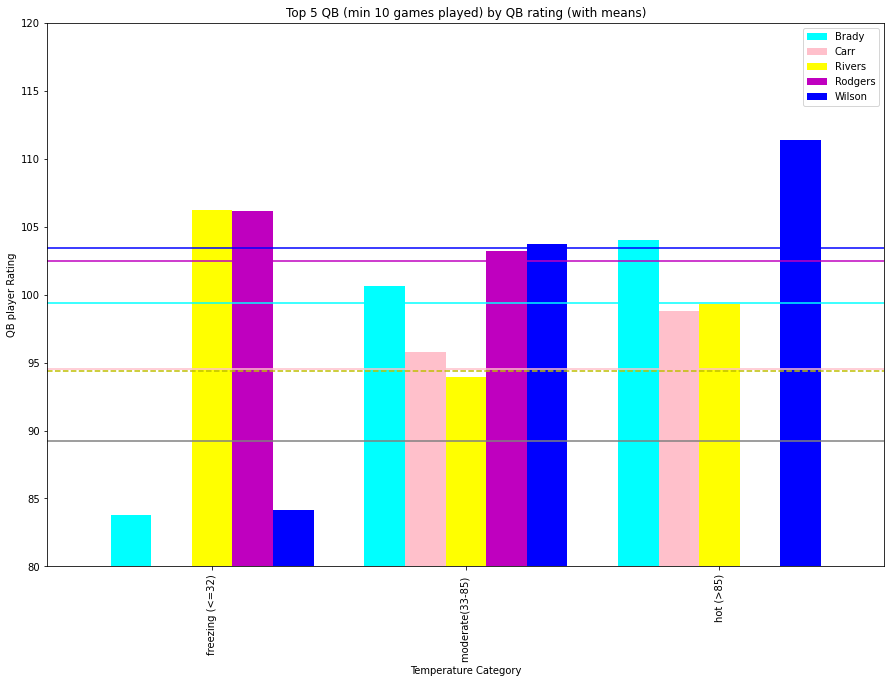

In [157]:
final_temperature_df.plot(kind="bar", width = .8, ylim= (80, 120), figsize = (15, 10), color= {"Brady": "cyan", "Carr": "pink", "Rivers": "yellow", "Rodgers": "m", "Wilson": "b"}) 
plt.title("Top 5 QB (min 10 games played) by QB rating (with means)")
plt.xlabel("Temperature Category")
plt.ylabel("QB player Rating")
plt.axhline(y=QB_overall_mean, color="gray", linestyle = '-')
plt.axhline(y=99.4, color="cyan", linestyle = '-')
plt.axhline(y=94.5, color="pink", linestyle = '-')
plt.axhline(y=94.4, color="y", linestyle = '--')
plt.axhline(y=102.5, color="m", linestyle = '-')
plt.axhline(y=103.4, color="b", linestyle = '-')


In [165]:
#bottom 5 by games rating with 10+ games
bottom_five_rating=["Kizer", "Foles", "Driskel", "Haskins", "Gabbert"]
bottom_five_df= QB_df[QB_df.lastName.isin(bottom_five_rating)].copy()

In [ ]:
for qb_name,df_temp in QB_df.groupby(['lastName']):
    
    
    temp_group = df_temp.groupby(['Temperature Category'])['QB Rating'].mean()

In [166]:
qb_temperature_bottom_df = pd.DataFrame(bottom_five_df.groupby\
                               (['lastName', 'Temperature Category'])["QB Rating"].mean().dropna()).reset_index()


In [167]:
final_temperature_bottom_df = pd.DataFrame({}, index=list(temp_group.index))
for idx,row in qb_temperature_bottom_df.iterrows():
    final_temperature_bottom_df.loc[row["Temperature Category"], row["lastName"]] = row["QB Rating"]

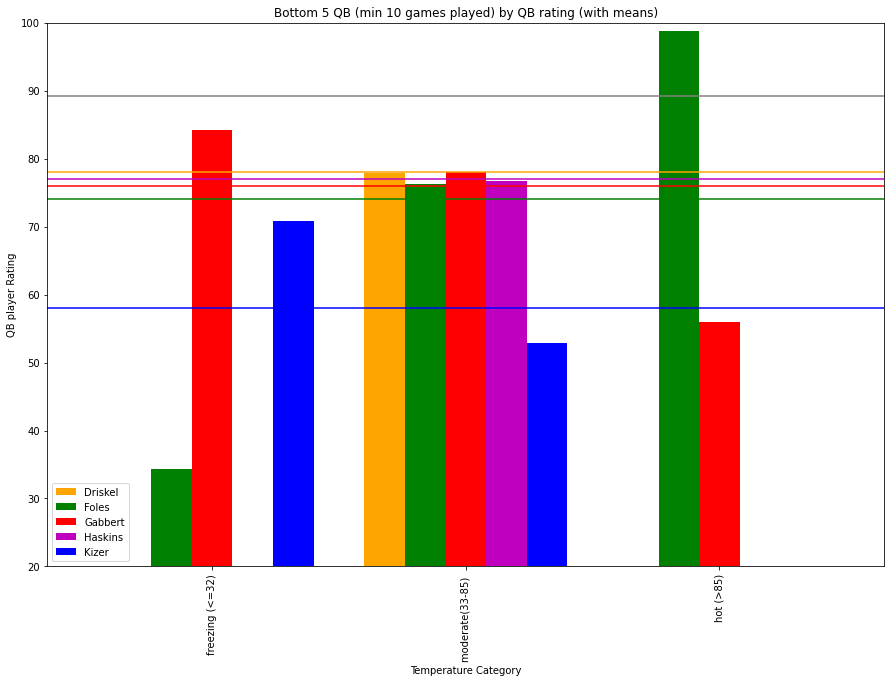

In [168]:
final_temperature_bottom_df.plot(kind="bar", width = .8, ylim= (20, 100), figsize = (15, 10), color= {"Kizer": "blue", "Foles": "green", "Driskel": "orange", "Haskins": "m", "Gabbert": "r"}) 
plt.title("Bottom 5 QB (min 10 games played) by QB rating (with means)")
plt.xlabel("Temperature Category")
plt.ylabel("QB player Rating")

plt.axhline(y=QB_overall_mean, color="gray", linestyle = '-')
plt.axhline(y=58, color="b", linestyle = '-')
plt.axhline(y=74, color="g", linestyle = '-')
plt.axhline(y=78, color="orange", linestyle = '-')
plt.axhline(y=77, color="m", linestyle = '-')
plt.axhline(y=76, color="r", linestyle = '-')


In [ ]:
fig, ax = plt.subplots()
for qb_name,df_temp in top_QB_Rating_df.groupby(['lastName']):

    if qb_name=="Henne":
        color="b"
    else:
        color="gray"
        
    temp_group = df_temp.groupby(['Wind Category'])['QB Rating'].mean()
    ax = pd.DataFrame(temp_group).reset_index().plot(ax=ax, kind='line', x='Wind Category',y='QB Rating', c=color, label=qb_name)

#x_axis = np.arange(len("Wind Category"))    
#tick_locations = [value for value in x_axis]

#plt.xticks(tick_locations, group_labels)
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
for qb_name,df_temp in top_QB_Rating_df.groupby(['lastName']):

    if qb_name=="Jackson":
        color="orange"
    else:
        color="gray"
        
    temp_group = df_temp.groupby(['Wind Category'])['QB Rating'].mean()
    ax = pd.DataFrame(temp_group).reset_index().plot(ax=ax, kind='line', x='Wind Category',y='QB Rating', c=color, label=qb_name)

#x_axis = np.arange(len("Wind Category"))    
#tick_locations = [value for value in x_axis]

#plt.xticks(tick_locations, group_labels)
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
for qb_name,df_temp in top_QB_Rating_df.groupby(['lastName']):

    if qb_name=="Mahomes":
        color="g"
    else:
        color="gray"
        
    temp_group = df_temp.groupby(['Wind Category'])['QB Rating'].mean()
    ax = pd.DataFrame(temp_group).reset_index().plot(ax=ax, kind='line', x='Wind Category',y='QB Rating', c=color, label=qb_name)

#x_axis = np.arange(len("Wind Category"))    
#tick_locations = [value for value in x_axis]

#plt.xticks(tick_locations, group_labels)
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
for qb_name,df_temp in top_QB_df.groupby(['lastName']):
    if qb_name=="Wilson":
        color="m"
    else:
        color="gray"
    
    temp_group = df_temp.groupby(['Wind Category'])['QB Rating'].mean()
    ax = pd.DataFrame(temp_group).reset_index().plot(ax=ax, kind='line', x='Wind Category',y='QB Rating',c=color, label=qb_name)
#xticks=
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
for qb_name,df_temp in top_QB_df.groupby(['lastName']):
    if qb_name=="Carr":
        color="y"
    else:
        color="gray"
    
    temp_group = df_temp.groupby(['Wind Category'])['QB Rating'].mean()
    ax = pd.DataFrame(temp_group).reset_index().plot(ax=ax, kind='line', x='Wind Category',y='QB Rating',c=color, label=qb_name)
#xticks=
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
for qb_name,df_temp in top_QB_df.groupby(['lastName']):
    if qb_name=="Brady":
        color="b"
    else:
        color="gray"
    
    temp_group = df_temp.groupby(['Wind Category'])['QB Rating'].mean()
    ax = pd.DataFrame(temp_group).reset_index().plot(ax=ax, kind='line', x='Wind Category',y='QB Rating',c=color, label=qb_name)

#x_axis = np.arange(len("Wind Category"))    
#tick_locations = [value for value in x_axis]

#plt.xticks(tick_locations, group_labels)
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
for qb_name,df_temp in top_QB_df.groupby(['lastName']):
    if qb_name=="Rivers":
        color="g"
    else:
        color="gray"
    
    temp_group = df_temp.groupby(['Wind Category'])['QB Rating'].mean()
    ax = pd.DataFrame(temp_group).reset_index().plot(ax=ax, kind='line', x='Wind Category',y='QB Rating',c=color, label=qb_name)
#xticks=
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
for qb_name,df_temp in top_QB_Rating_df.groupby(['lastName']):

    if qb_name=="Weeden":
        color="r"
    else:
        color="gray"
        
    temp_group = df_temp.groupby(['Wind Category'])['QB Rating'].mean()
    ax = pd.DataFrame(temp_group).reset_index().plot(ax=ax, kind='line', x='Wind Category',y='QB Rating', c=color, label=qb_name)

#x_axis = np.arange(len("Wind Category"))    
#tick_locations = [value for value in x_axis]

#plt.xticks(tick_locations, group_labels)
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
for qb_name,df_temp in top_QB_Rating_df.groupby(['lastName']):

    if qb_name=="Wilson":
        color="purple"
    else:
        color="gray"
        
    temp_group = df_temp.groupby(['Wind Category'])['QB Rating'].mean()
    ax = pd.DataFrame(temp_group).reset_index().plot(ax=ax, kind='line', x='Wind Category',y='QB Rating', c=color, label=qb_name)

#x_axis = np.arange(len("Wind Category"))    
#tick_locations = [value for value in x_axis]

#plt.xticks(tick_locations, group_labels)
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
for qb_name,df_temp in top_QB_df.groupby(['lastName']):
    if qb_name=="Rodgers":
        color="r"
    else:
        color="gray"
    
    temp_group = df_temp.groupby(['Wind Category'])['QB Rating'].mean()
    ax = pd.DataFrame(temp_group).reset_index().plot(ax=ax, kind='line', x='Wind Category',y='QB Rating',c=color, label=qb_name)
#xticks=
ax.set_xlim(left=0, right=6)

plt.legend()
plt.show()

In [ ]:
QB_index=QB_df.set_index("lastName").groupby(["lastName"])
Avg_QB_Rating_df=QB_index["QB Rating"].mean()

Avg_QB_Rating_df.sort_values(ascending=False).tail(20)

In [ ]:
games_played_query=QB_df.query('lastName == "Tolzien"or lastName == "Stidham"  or lastName == "Sanchez" or \
lastName == "Walker" or lastName == "Sudfield" ')

games_played_query["lastName"].value_counts()

In [ ]:
games_played_query=QB_df.query('lastName == "Luten"or lastName == "Peterman"  or lastName == "Stanton" or \
lastName == "Finley" or lastName == "Kizer" ')

games_played_query["lastName"].value_counts()

In [ ]:
games_played_query=QB_df.query('lastName == "Hurts" or lastName == "Griffin"  or lastName == "Falk" or \
lastName == "Petty" or lastName == "Rosen" ')

games_played_query["lastName"].value_counts()

In [ ]:
games_played_query=QB_df.query('lastName == "DiNucci"or lastName == "Clausen"  or lastName == "Savage" or \
lastName == "Rypien" or lastName == "Cassel" ')

games_played_query["lastName"].value_counts()

In [ ]:
#fig, ax = plt.subplots()
#bar_colors = ["blue", "red", "green", "yellow", "purple"]
#for qb_name,df_temp in top_QB_Rating_df.groupby(['lastName']):
    
   # c = bar_colors.pop()
    ##temp_group = df_temp.groupby(['Wind Category'])['QB Rating'].mean()
    #ax = pd.DataFrame(temp_group).reset_index().plot(ax=ax, kind='bar', x='Wind Category',y='QB Rating', label=qb_name,color=c)

#x_axis = np.arange(len("Wind Category"))    
#tick_locations = [value for value in x_axis]

#plt.xticks(tick_locations, group_labels)
#plt.legend()
#plt.show()
#print(sts.normaltest(top_QB_Rating_df["QB Rating"]))

In [ ]:
QB_wind.loc["Wind Category"]=pd.cut(QB_wind["windSpeed"], bins, labels=group_labels)
QB_wind.head()

In [ ]:
windspeed_group_df= QB_wind.groupby("Wind Category")
print(windspeed_group_df["QB Rating"].count())

In [ ]:
windspeed_top5_df= QB_wind.groupby("Wind Category")
print(windspeed_top5_df["QB Rating"].count())

In [ ]:
plt.title("QB rating vs windspeed")
plt.xlabel("wind conditions")
plt.ylabel("QB player Rating")
plt.scatter(windspeed_group_df["Wind Category"], windspeed_group_df["QB Rating"], color='r')

In [ ]:
QB_rating_condition_narrow = QB_rating_condition.query('conditions == "clear sky" or conditions == "overcast clouds" or conditions == "light snow" ')
QB_rating_condition_narrow

In [ ]:
x_axis_pd = QB_rating_condition_narrow["conditions"]
x_axis_pd 

In [ ]:
plt.title("QB rating vs weather conditions")
plt.xlabel("weather conditions")
plt.ylabel("QB player Rating")
plt.bar(QB_rating_condition_narrow["conditions"], QB_rating_condition_narrow["QB Rating"], color='b', alpha=0.5, align="center")

In [ ]:
x_axis_wind_speed = weather_QB_pd["windSpeed"]
x_axis_wind_speed
y_axis_wind_speed = weather_QB_pd["QB Rating"]
plt.xlabel("wind speed")
plt.ylabel("QB player Rating")
plt.bar(x_axis_wind_speed, y_axis_wind_speed , color='b', alpha=0.5, align="center")

In [ ]:
QB_rating_temperature = weather_QB_pd[["QB Rating", "temperature"]]

#Remove Nan from dataSet
QB_rating_temperature["temperature"].value_counts()

In [ ]:
QB_rating_temperature.dropna(inplace=True)

In [ ]:
QB_rating_temperature


In [ ]:
x_values= QB_rating_temperature["temperature"]
y_values= QB_rating_temperature["QB Rating"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.title("QB_rating' VS  Temperature")
plt.xlabel('temperature')
plt.ylabel('QB Rating')
plt.xlim(0,100)
plt.ylim(0,200)
plt.grid(True)
plt.show()
print(f"The r-squared value is: {rvalue**2}")
print(f"The p-value is : {p})


In [ ]:
 QB_rating_temperature["QB Rating"]

In [ ]:
fig, ax = plt.subplots()
for qb_name,df_temp in top_QB_df.groupby(['lastName']):
    
    
    temp_group = df_temp.groupby(['Wind Category'])['QB Rating'].mean()
    ax = pd.DataFrame(temp_group).reset_index().plot(ax=ax, kind='line', x='Wind Category',y='QB Rating', label=qb_name)

#x_axis = np.arange(len("Wind Category"))    
#tick_locations = [value for value in x_axis]

#plt.xticks(tick_locations, group_labels)
plt.legend()
plt.show()
print(sts.normaltest(top_QB_df["QB Rating"]))

In [ ]:
#Rain
QB_rating_rain_df1 = weather_QB_pd.query('(conditions == "rain rain " or conditions == "heavy intensity rain") and lastName == "Jackson" ')

QB_rating_rain_df1

In [ ]:
QB_rating_rain_df2 = weather_QB_pd.query('conditions == "heavy intensity rain"')

QB_rating_rain_df2

In [ ]:
weather_QB_pd[["QB Rating"]].describe

In [ ]:
#weather data weather_QB_pd
weather_QB_pd[["windSpeed","temperature","conditions"]]